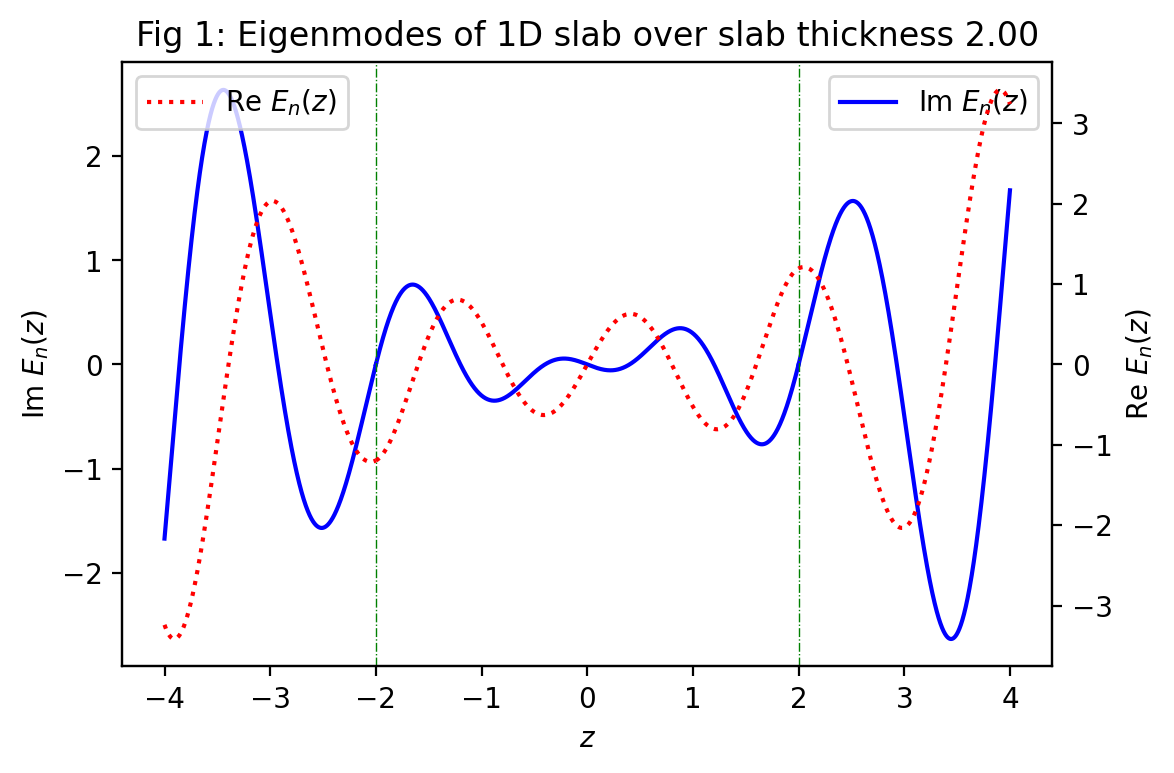

In [14]:
import numpy as np
import math
import cmath
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr

def refr(ep): #defining a function to calculate the root of the dialectric constant 
    return np.sqrt(ep)

def alpha_func(ep): #relation between the dielecric constant and alpha (below eq.4 in Muljarov 2010)
    return (refr(ep)+1)/(refr(ep)-1)

def wavnum_k(n,ep): #function to calculate the wavenumber (eq.4 in Muljarov 2010)
    return 1/(2*a*refr(ep)) *(np.pi * n -1j* np.log(alpha_func(ep)))
    
def A_greens_func(a,q,alpha,z_r,z_l): #analytical form of the Green's Function (eq.8 in Muljarov 2010)
    i_q = complex(0,q)
    exp_num_1 = cmath.exp(i_q*(a-z_r)) #determining each term in the equation separately
    exp_num_2 = cmath.exp(-i_q*(a-z_r))
    exp_num_3 = cmath.exp(i_q*(a-z_l))
    exp_num_4 = cmath.exp(-i_q*(a-z_l))
    exp_denom_1 = cmath.exp(i_q*a)
    exp_denom_2 = cmath.exp(-i_q*a)
    term1 = (exp_num_1 + alpha*exp_num_2)/(exp_denom_1 + alpha*exp_denom_2)
    term2 = (exp_num_3 + alpha*exp_num_4)/(-exp_denom_1 + alpha*exp_denom_2)
    return(1/(2*i_q)*term1*term2)

def PF_greens_func(eig1,eig2,k,k_n,n): #function to determine the partial fractions version of the Green's Function (eq.9 in Muljarov 2010)
    pf_sum = 0
    for i in range(n):
        pf_sum = pf_sum + (eig1*eig2)/(2*k*(k-k_n))
    return(pf_sum)   
    
'''
def eigenfunction_En(ep,b_n,k_n,z_r,n): #function to calculate the electric field eigenfunctions (eq.3 in Muljarov 2010)
    delta = complex(0,np.sqrt(ep)*k_n*z_r)
    return b_n*cmath.exp(delta) + (-1)**n*(cmath.exp(-delta))
'''
    
#transmission equation (eq.29 from Doost 2012)
def A_transmission(k,a):
    return np.abs(2*k*A_greens_func(a,-a,k)) 
    
#transmission equation (eq.29 from Doost 2012)
def N_transmission(k,a):
    return np.abs(2*k*PF_greens_func(a,-a,k)) 

#eigenvalue equation for eigenmodes on the left of the slab    
def en_z_l(n,An,z):
    return (-1)**(n)*An*cmath.exp(-1j*wavnum_k(n,ep)*z)

#eigenvalue equation for eigenmodes in the slab    
def en_z_c(n,Bn,z,ep):
    return Bn * (cmath.exp(1j*refr(ep)*wavnum_k(n,ep)*z) + (-1)**(n) * cmath.exp(-1j*refr(ep)*wavnum_k(n,ep)*z))

#eigenvalue equation for eigenmodes on the right of the slab    
def en_z_r(n,An,z,ep):
    return An*cmath.exp(1j*wavnum_k(n,ep)*z)

#Einstein A coefficient
def An(n,ep,a):
    return cmath.exp(-1j*wavnum_k(n,ep)*a)/np.sqrt(a*(ep-1))

#Einstein B coefficient
def Bn(n,a,ep):
    return ((-1j)**n)/(2*np.sqrt(a*ep))
     
#establishing constants needed in the functions above
ep = 1.35
oo = 2
n = 5
a = 2
i = complex(0,1)

   
#establishing arrays to iterate over imposing thickness limit
z_l = np.linspace(-oo*a,-a,1000)
z_c = np.linspace(-a,a,1000)
z_r = np.linspace(a,oo*a,1000)

#establishing array for eigenmodes 
En_l = np.zeros((2,len(z_l)))
En_c = np.zeros((2,len(z_c)))
En_r = np.zeros((2,len(z_r)))

#iterating over eigenmode arrays and calculating eigenfunctions
for i in range(len(z_l)): 
    En_l[0,i] = en_z_l(n,An(n,ep,a),z_l[i]).imag
    En_l[1,i] = en_z_l(n,An(n,ep,a),z_l[i]).real
    
for i in range(len(z_c)):
    En_c[0,i] = en_z_c(n,Bn(n,a,ep),z_c[i],ep).imag
    En_c[1,i] = en_z_c(n,Bn(n,a,ep),z_c[i],ep).real
    
for i in range(len(z_r)):
    En_r[0,i] = en_z_r(n,An(n,ep,a),z_r[i],ep).imag
    En_r[1,i] = en_z_r(n,An(n,ep,a),z_r[i],ep).real

#plotting
figg = 1
fig0,ax0 = plt.subplots(dpi=200,num=1)
ax0.set_title("Fig %d: Eigenmodes of 1D slab over slab thickness %.2f" %(figg,a)) 

ax0.plot(z_l,En_l[0,:], color = 'b')
ax0.plot(z_c,En_c[0,:], color = 'b')
ax0.plot(z_r,En_r[0,:], color = 'b', label = 'Im $E_n(z)$')
plt.legend()

ax0.axvline(x=-a,color='g',ls='-.',lw=0.5, label='slab')
ax0.axvline(x=a,color='g',ls='-.',lw=0.5)
ax0.set_xlabel("$z$")
ax0.set_ylabel("Im $E_n(z)$")

ax0 = ax0.twinx()
ax0.plot(z_l,En_l[1,:], color='r', ls=':', label = 'Re $E_n(z)$')
ax0.plot(z_c,En_c[1,:], color='r', ls=':')
ax0.plot(z_r,En_r[1,:], color='r', ls=':')
ax0.set_ylabel("Re $E_n(z)$")
plt.legend()